$$Pupipat Singkhorn$$

# Homework 1 Clustering and Regression

## Metrics

| Model A | Predicted dog | Predicted cat |
| ----------- | :-: | :-: |
| **Actual dog** | 30 | 20 | 
| **Actual cat** | 10 | 40 |

### T1.
What is the accuracy of Model A?

In [1]:
tn = 30
fn = 10
fp = 20
tp = 40

accuracy = ( tp+tn ) / ( tp+tn+fp+fn )

print(f'Accuracy = {accuracy}')

Accuracy = 0.7


### T2.
Consider cats as ‘class 1’ (positive) and dogs as ‘class 0’ (negative),
calculate the precision, recall, and F1.

| Model A | Predicted dog (-) | Predicted cat (+) |
| ----------- | :-: | :-: |
| **Actual dog** | TN | FP | 
| **Actual cat** | FN | TP |

In [2]:
accuracy = ( tp+tn ) / ( tp+tn+fp+fn )
print(f'Accuracy = {accuracy}')

Accuracy = 0.7


In [3]:
tn = 30
fn = 10
fp = 20
tp = 40

precision = tp / (tp+fp)
recall = tp / (tp+fn)
F1 = 2*tp / ( 2*tp + fp + fn )

print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 = {F1}')

Precision = 0.6666666666666666
Recall = 0.8
F1 = 0.7272727272727273


### T3.
Consider class cat as ‘class 0’ and class dog as ‘class 1’, calculate the precision, recall, and F1.

| Model A | Predicted dog (+) | Predicted cat (-) |
| ----------- | :-: | :-: |
| **Actual dog** | TP | FN | 
| **Actual cat** | FP | TN |

In [4]:
accuracy = ( tp+tn ) / ( tp+tn+fp+fn )

print(f'Accuracy = {accuracy}')

Accuracy = 0.7


In [5]:
tp = 30
tn = 40
fp = 10
fn = 20

precision = tp / (tp+fp)
recall = tp / (tp+fn)
F1 = 2*tp / ( 2*tp + fp + fn )

print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 = {F1}')

Precision = 0.75
Recall = 0.6
F1 = 0.6666666666666666


### T4.
Now consider a lopsided population where there are 80% cats.\
What is the accuracy of Model A?\
Using dog as the positive class, what is the precision, recall, and F1?\
Explain how and why these numbers change (or does not change) from the previous questions.

| Model A | Predicted dog (+) | Predicted cat (-) |
| ----------- | :-: | :-: |
| **Actual dog** | TP | FN | 
| **Actual cat** | FP | TN |

| Model A | Predicted dog | Predicted cat |
| ----------- | :-: | :-: |
| **Actual dog** | 30 | 20 | 
| **Actual cat** | 10 | 40 |

$Total Population = x$\
$Actual dog = 0.2x$ (20% dogs)\
$Actual cat = 0.8x$ (80% cats)

$Actual dog Predicted dog(TP) = 0.2x*\frac{30}{(30+20)} = 0.12x$\
$Actual dog Predicted cat(FN) = 0.2x*\frac{20}{(30+20)} = 0.08x$\
$Actual cat Predicted dog(FP) = 0.8x*\frac{10}{(10+40)} = 0.16x$\
$Actual cat Predicted cat(TN) = 0.8x*\frac{40}{(10+40)} = 0.64x$

| Model A | Predicted dog | Predicted cat |
| ----------- | :-: | :-: |
| **Actual dog** | 0.12x | 0.08x | 
| **Actual cat** | 0.16x | 0.64x |

$$
Accuracy = \frac{tp+tn} {tp+tn+fp+fn}
= \frac{0.12x+0.64x} {0.12x+0.64x+0.16x+0.08x}
= 0.76
$$
*Accuracy* increase 

$$
precision = \frac{tp}{tp+fp}
= \frac{0.12x}{0.12x+0.16x}
= 0.4285
$$
*precision* decrease

$$
recall = \frac{tp}{tp+fn}
= \frac{0.12x}{0.12x+0.08x}
= 0.6
$$
*recall* doesn't change

$$
F1 = \frac{2} {1/recall + 1/precision}
= \frac{2} {1/0.6 + 1/0.4285}
= 0.5
$$
*F1* decrease

### OT1.
Consider the equations for accuracy and F1.
When will accuracy be equal, greater, or less than F1?

$$
Accuracy = \frac{tp+tn} {tp+tn+fp+fn}
= \frac{1} {1+\frac{fp+fn} {tp+\textbf{tn}}}
$$

$$
F1 = \frac{2tp} {2tp+fp+fn}
= \frac{1} {1+\frac{fp+fn} {tp+\textbf{tp}}}
$$

$$ \therefore Accuracy = F1   ; tn = tp $$
$$ \therefore Accuracy > F1   ; tn > tp $$
$$ \therefore Accuracy < F1   ; tn < tp $$

## Hello Clustering

Recall from lecture that K-means has two main steps: the points assignment step, and the mean update step. After the initialization of the centroids, we assign each data point to a centroid. Then, each centroids are updated by re-estimating the means.
Concretely, if we are given N data points, x1, x2, ..., xN , and we would like to form K clusters. We do the following;
1. Initialization: Pick K random data points as K centroid locations c1, c2, ..., cK.
2. Assign: For each data point k, find the closest centroid. Assign that data point to the centroid. The distance used is typically Euclidean distance.
3. Update: For each centroid, calculate the mean from the data points assigned to it.
4. Repeat: repeat step 2 and 3 until the centroids stop changing (convergence).

Given the following data points in x-y coordinates (2 dimensional)

| x | y |
| :-: | :-: |
| 1 | 2 |
| 3 | 3 |
| 2 | 2 |
| 8 | 8 |
| 6 | 6 |
| 7 | 7 |
| -3 | -3 |
| -2 | -4 |
| -7 | -7 |

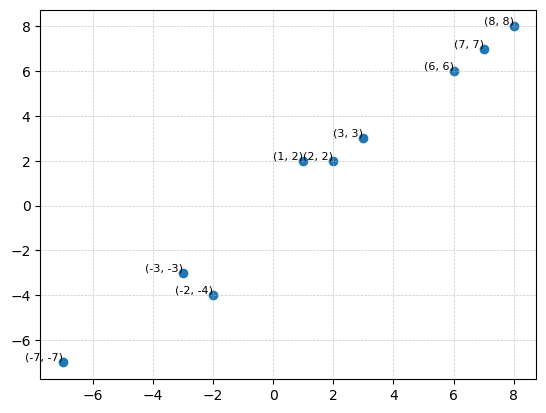

In [6]:
import matplotlib.pyplot as plt
import numpy as np

data_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
data_y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])

# Scatter plot with detailed grid lines
plt.scatter(data_x, data_y)

# Customize grid lines
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels for each point
for i, txt in enumerate(zip(data_x, data_y)):
    plt.text(txt[0], txt[1], f'({txt[0]}, {txt[1]})', fontsize=8, ha='right', va='bottom')

# Show the plot
plt.show()

### T5.
If the starting points are (3,3), (2,2), and (-3,-3). Describe each assign and update step. What are the points assigned? What are the updated centroids? You may do this calculation by hand or write a program to do it.

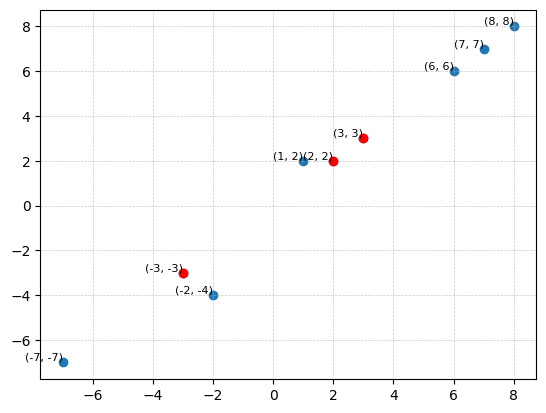

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
data_y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])

# Scatter plot with detailed grid lines
plt.scatter(data_x, data_y)

# Customize grid lines
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels for each point
for i, txt in enumerate(zip(data_x, data_y)):
    plt.text(txt[0], txt[1], f'({txt[0]}, {txt[1]})', fontsize=8, ha='right', va='bottom')
    
# Add a red point at coordinates
plt.plot([3, 2, -3], [3, 2, -3], 'ro')

# Show the plot
plt.show()

#### K-mean clustering
1. Randomly init k centroids by picking from data points
2. Assign each data points to centroids
3. Update centroids for each cluster
4. Repeat 2-3 until centroids does not change

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [9]:
# function
def distance(point1, point2): # Euclidean Distance
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2) #float

def assign(data_points, cluster_centroid, cluster_points):
    for point in data_points: # assign each point to cluster
        distances = [distance(point, centroid) for centroid in cluster_centroid.values()]
        min_distance_index = np.argmin(distances)
        cluster_points[min_distance_index].append(point)
        
def update_centroids(cluster_centroid, cluster_points, centroid_isUpdating):
    old_centroids = list(cluster_centroid.values())
    
    # calculate new_centroids
    new_centroids = []
    for idx, points in cluster_points.items():
        if points:  # Check if points list is not empty
            new_centroid_x, new_centroid_y = np.mean(points, axis=0)
            new_centroid = (new_centroid_x, new_centroid_y)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(cluster_centroid[idx]) # Use the existing centroid if no points in the cluster

    # update new centroid
    for idx, centroid in enumerate(new_centroids):
        cluster_centroid[idx] = centroid

    if new_centroids == old_centroids:
        centroid_isUpdating = False
    return centroid_isUpdating #bool

def plot_clusters(data_points, cluster_centroid, cluster_points, title):
    for idx, points in cluster_points.items():
        cluster_x, cluster_y = zip(*points)
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {idx}')

    # Annotate centroids with coordinates
    for idx, (x, y) in cluster_centroid.items():
        plt.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

    centroid_x, centroid_y = zip(*cluster_centroid.values())
    plt.scatter(centroid_x, centroid_y, color='red', marker='X',s=90, alpha=0.7, label='Centroid')

    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()
    plt.show()

Initial cluster_centroid {0: (3, 3), 1: (2, 2), 2: (-3, -3)}
Initial cluster_points {0: [], 1: [], 2: []}
Round 1
cluster_centroid {0: (6.0, 6.0), 1: (1.5, 2.0), 2: (-4.0, -4.666666666666667)}
cluster_points {0: [(3, 3), (8, 8), (6, 6), (7, 7)], 1: [(1, 2), (2, 2)], 2: [(-3, -3), (-2, -4), (-7, -7)]}


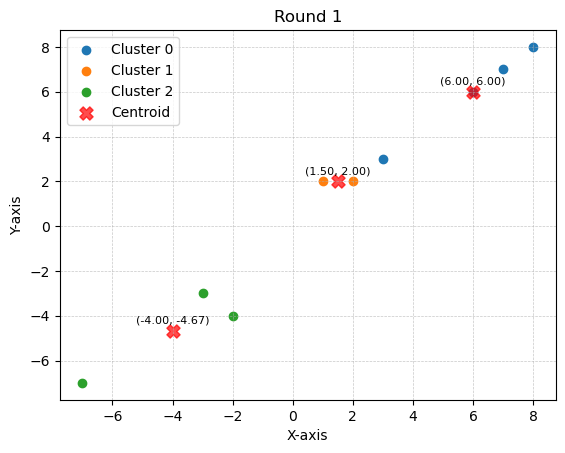

Round 2
cluster_centroid {0: (7.0, 7.0), 1: (2.0, 2.3333333333333335), 2: (-4.0, -4.666666666666667)}
cluster_points {0: [(8, 8), (6, 6), (7, 7)], 1: [(1, 2), (3, 3), (2, 2)], 2: [(-3, -3), (-2, -4), (-7, -7)]}


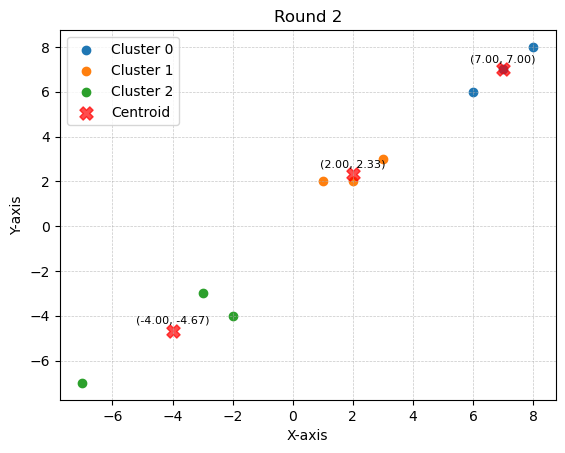

Round 3
cluster_centroid {0: (7.0, 7.0), 1: (2.0, 2.3333333333333335), 2: (-4.0, -4.666666666666667)}
cluster_points {0: [(8, 8), (6, 6), (7, 7)], 1: [(1, 2), (3, 3), (2, 2)], 2: [(-3, -3), (-2, -4), (-7, -7)]}


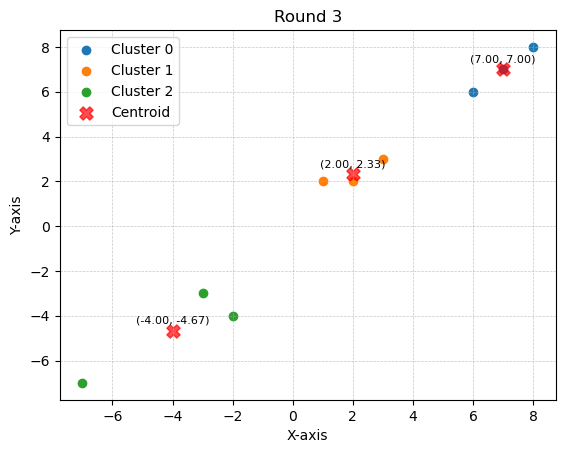

Final cluster_centroids: {0: (7.0, 7.0), 1: (2.0, 2.3333333333333335), 2: (-4.0, -4.666666666666667)}


In [10]:
# Main function
data_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
data_y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data_points = list(zip(data_x, data_y))  # list of tuple [(x1, y1), (x2, y2), ...]

# Initialize k centroids
init_centroids = [(3,3), (2,2), (-3,-3)]
    # keyboard input
# k = int(input('k = '))
# init_centroids = []
# for i in range(k):
#     l = input('x,y = ').split()
#     x = int(l[0])
#     y = int(l[1])
#     init_centroids.append((x,y))

# Initialize cluster
cluster_centroid = dict() # {0: (x, y), 1: ...}
cluster_points = dict() # {0: [(),()], 1: ...}
for idx, point in enumerate(init_centroids):
    cluster_centroid[idx] = point
    cluster_points[idx] = []
print(f'Initial cluster_centroid {cluster_centroid}')
print(f'Initial cluster_points {cluster_points}')

centroid_isUpdating = True
round = 1
while centroid_isUpdating:
    print(f'Round {round}')
    # Clear cluster_points before updating
    cluster_points = {idx: [] for idx in cluster_points}
    
    # Assign each data point to clusters
    assign(data_points, cluster_centroid, cluster_points)
    
    # Update centroids
    centroid_isUpdating = update_centroids(cluster_centroid, cluster_points, centroid_isUpdating)
    print(f'cluster_centroid {cluster_centroid}')
    print(f'cluster_points {cluster_points}')
    
    # Plot clusters for each round
    plot_clusters(data_points, cluster_centroid, cluster_points, title=f'Round {round}')
    round += 1

print(f'Final cluster_centroids: {cluster_centroid}')

### T6.
If the starting points are (-3,-3), (2,2), and (-7,-7), what happens?

Initial cluster_centroid {0: (-3, -3), 1: (2, 2), 2: (-7, -7)}
Initial cluster_points {0: [], 1: [], 2: []}
Round 1
cluster_centroid {0: (-2.5, -3.5), 1: (4.5, 4.666666666666667), 2: (-7.0, -7.0)}
cluster_points {0: [(-3, -3), (-2, -4)], 1: [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)], 2: [(-7, -7)]}


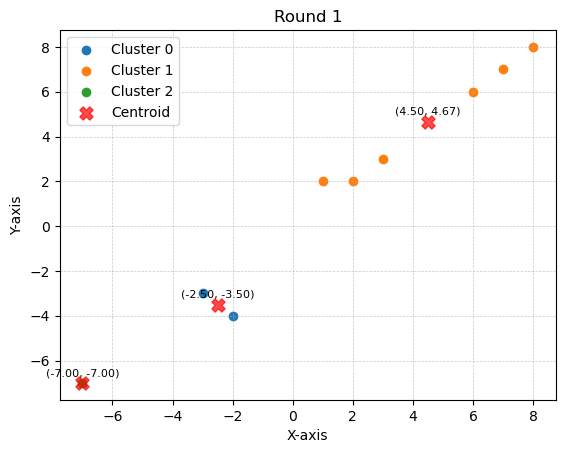

Round 2
cluster_centroid {0: (-2.5, -3.5), 1: (4.5, 4.666666666666667), 2: (-7.0, -7.0)}
cluster_points {0: [(-3, -3), (-2, -4)], 1: [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)], 2: [(-7, -7)]}


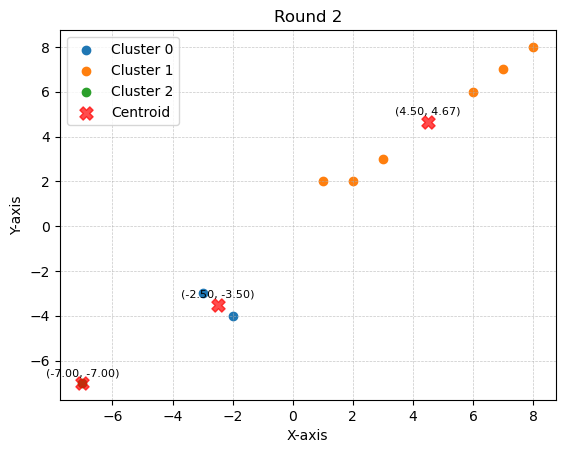

Final cluster_centroids: {0: (-2.5, -3.5), 1: (4.5, 4.666666666666667), 2: (-7.0, -7.0)}


In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

# function
def distance(point1, point2): # Euclidean Distance
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2) #float

def assign(data_points, cluster_centroid, cluster_points):
    for point in data_points: # assign each point to cluster
        distances = [distance(point, centroid) for centroid in cluster_centroid.values()]
        min_distance_index = np.argmin(distances)
        cluster_points[min_distance_index].append(point)
        
def update_centroids(cluster_centroid, cluster_points, centroid_isUpdating):
    old_centroids = list(cluster_centroid.values())
    
    # calculate new_centroids
    new_centroids = []
    for idx, points in cluster_points.items():
        if points:  # Check if points list is not empty
            new_centroid_x, new_centroid_y = np.mean(points, axis=0)
            new_centroid = (new_centroid_x, new_centroid_y)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(cluster_centroid[idx]) # Use the existing centroid if no points in the cluster

    # update new centroid
    for idx, centroid in enumerate(new_centroids):
        cluster_centroid[idx] = centroid

    if new_centroids == old_centroids:
        centroid_isUpdating = False
    return centroid_isUpdating #bool

def plot_clusters(data_points, cluster_centroid, cluster_points, title):
    for idx, points in cluster_points.items():
        cluster_x, cluster_y = zip(*points)
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {idx}')

    # Annotate centroids with coordinates
    for idx, (x, y) in cluster_centroid.items():
        plt.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

    centroid_x, centroid_y = zip(*cluster_centroid.values())
    plt.scatter(centroid_x, centroid_y, color='red', marker='X',s=90, alpha=0.7, label='Centroid')

    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()
    plt.show()

# Main function
data_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
data_y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data_points = list(zip(data_x, data_y))  # list of tuple [(x1, y1), (x2, y2), ...]

# Initialize k centroids
init_centroids = [(-3,-3), (2,2), (-7,-7)]
    # keyboard input
# k = int(input('k = '))
# init_centroids = []
# for i in range(k):
#     l = input('x,y = ').split()
#     x = int(l[0])
#     y = int(l[1])
#     init_centroids.append((x,y))

# Initialize cluster
cluster_centroid = dict() # {0: (x, y), 1: ...}
cluster_points = dict() # {0: [(),()], 1: ...}
for idx, point in enumerate(init_centroids):
    cluster_centroid[idx] = point
    cluster_points[idx] = []
print(f'Initial cluster_centroid {cluster_centroid}')
print(f'Initial cluster_points {cluster_points}')

centroid_isUpdating = True
round = 1
while centroid_isUpdating:
    print(f'Round {round}')
    # Clear cluster_points before updating
    cluster_points = {idx: [] for idx in cluster_points}
    
    # Assign each data point to clusters
    assign(data_points, cluster_centroid, cluster_points)
    
    # Update centroids
    centroid_isUpdating = update_centroids(cluster_centroid, cluster_points, centroid_isUpdating)
    print(f'cluster_centroid {cluster_centroid}')
    print(f'cluster_points {cluster_points}')
    
    # Plot clusters for each round
    plot_clusters(data_points, cluster_centroid, cluster_points, title=f'Round {round}')
    round += 1

print(f'Final cluster_centroids: {cluster_centroid}')

### T7.
Between the two starting set of points in the previous two questions,\
which one do you think is better?\
How would you measure the ‘goodness’ quality of a set of starting points?

*Answer*

**Which one do you think is better?**

Set of points in T5. question (3,3), (2,2), (-3,-3)
because this set has the same amount of data in each cluster, and upon visual inspection, there is no group straddling, unlike T6 question.

**How would you measure the ‘goodness’ quality of a set of starting points?**

The 'goodness' quality of a set of starting points can be measured using various metrics such as Inertia (Within-Cluster Sum of Squares), Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index (Variance Ratio Criterion), or it can be assessed visually.

### OT2.
What would be the best K for this question? Describe your reasoning.

**Answer**: $K = 4$, From visual observation, it is evident that when K = 4, the grouping is more appropriate. The centroids of all points are close to the data within their respective clusters, unlike K = 3, where one cluster located at the bottom left corner of the image has a centroid positioned in the middle, serving as a representative between the three data points.

Initial cluster_centroid {0: (-3, -3), 1: (2, 2), 2: (-7, -7), 3: (0, 0)}
Initial cluster_points {0: [], 1: [], 2: [], 3: []}
Round 1
cluster_centroid {0: (-2.5, -3.5), 1: (4.5, 4.666666666666667), 2: (-7.0, -7.0), 3: (0, 0)}
cluster_points {0: [(-3, -3), (-2, -4)], 1: [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)], 2: [(-7, -7)], 3: []}
Round 1
cluster_centroid {0: (-2.5, -3.5), 1: (6.0, 6.0), 2: (-7.0, -7.0), 3: (1.5, 2.0)}
cluster_points {0: [(-3, -3), (-2, -4)], 1: [(3, 3), (8, 8), (6, 6), (7, 7)], 2: [(-7, -7)], 3: [(1, 2), (2, 2)]}
Round 1
cluster_centroid {0: (-2.5, -3.5), 1: (7.0, 7.0), 2: (-7.0, -7.0), 3: (2.0, 2.3333333333333335)}
cluster_points {0: [(-3, -3), (-2, -4)], 1: [(8, 8), (6, 6), (7, 7)], 2: [(-7, -7)], 3: [(1, 2), (3, 3), (2, 2)]}
Round 1
cluster_centroid {0: (-2.5, -3.5), 1: (7.0, 7.0), 2: (-7.0, -7.0), 3: (2.0, 2.3333333333333335)}
cluster_points {0: [(-3, -3), (-2, -4)], 1: [(8, 8), (6, 6), (7, 7)], 2: [(-7, -7)], 3: [(1, 2), (3, 3), (2, 2)]}
Final cluster_ce

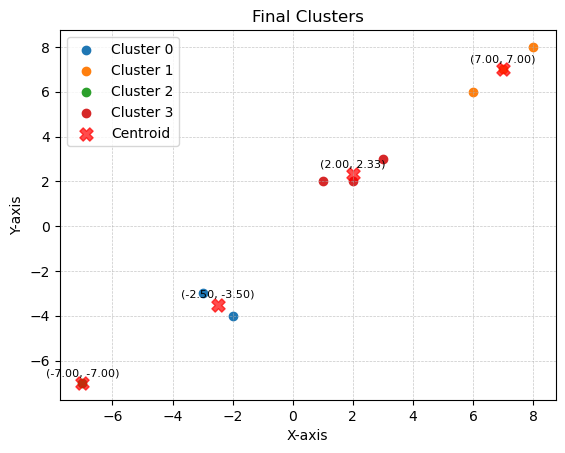

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt

# function
def distance(point1, point2): # Euclidean Distance
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2) #float

def assign(data_points, cluster_centroid, cluster_points):
    for point in data_points: # assign each point to cluster
        distances = [distance(point, centroid) for centroid in cluster_centroid.values()]
        min_distance_index = np.argmin(distances)
        cluster_points[min_distance_index].append(point)
        
def update_centroids(cluster_centroid, cluster_points, centroid_isUpdating):
    old_centroids = list(cluster_centroid.values())
    
    # calculate new_centroids
    new_centroids = []
    for idx, points in cluster_points.items():
        if points:  # Check if points list is not empty
            new_centroid_x, new_centroid_y = np.mean(points, axis=0)
            new_centroid = (new_centroid_x, new_centroid_y)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(cluster_centroid[idx]) # Use the existing centroid if no points in the cluster

    # update new centroid
    for idx, centroid in enumerate(new_centroids):
        cluster_centroid[idx] = centroid

    if new_centroids == old_centroids:
        centroid_isUpdating = False
    return centroid_isUpdating #bool

def plot_clusters(data_points, cluster_centroid, cluster_points, title):
    for idx, points in cluster_points.items():
        cluster_x, cluster_y = zip(*points)
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {idx}')

    # Annotate centroids with coordinates
    for idx, (x, y) in cluster_centroid.items():
        plt.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

    centroid_x, centroid_y = zip(*cluster_centroid.values())
    plt.scatter(centroid_x, centroid_y, color='red', marker='X',s=90, alpha=0.7, label='Centroid')

    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()
    plt.show()

# Main function
data_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
data_y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data_points = list(zip(data_x, data_y))  # list of tuple [(x1, y1), (x2, y2), ...]

# Initialize k centroids
init_centroids = [(-3,-3), (2,2), (-7,-7), (0,0)]
    # keyboard input
# k = int(input('k = '))
# init_centroids = []
# for i in range(k):
#     l = input('x,y = ').split()
#     x = int(l[0])
#     y = int(l[1])
#     init_centroids.append((x,y))

# Initialize cluster
cluster_centroid = dict() # {0: (x, y), 1: ...}
cluster_points = dict() # {0: [(),()], 1: ...}
for idx, point in enumerate(init_centroids):
    cluster_centroid[idx] = point
    cluster_points[idx] = []
print(f'Initial cluster_centroid {cluster_centroid}')
print(f'Initial cluster_points {cluster_points}')

centroid_isUpdating = True
round = 1
while centroid_isUpdating:
    print(f'Round {round}')
    # Clear cluster_points before updating
    cluster_points = {idx: [] for idx in cluster_points}
    
    # Assign each data point to clusters
    assign(data_points, cluster_centroid, cluster_points)
    
    # Update centroids
    centroid_isUpdating = update_centroids(cluster_centroid, cluster_points, centroid_isUpdating)
    print(f'cluster_centroid {cluster_centroid}')
    print(f'cluster_points {cluster_points}')
    
    # # Plot clusters for each round
    # plot_clusters(data_points, cluster_centroid, cluster_points, title=f'Round {round}')
    # round += 1

print(f'Final cluster_centroids: {cluster_centroid}')

plot_clusters(data_points, cluster_centroid, cluster_points, title='Final Clusters')

image for K = 4

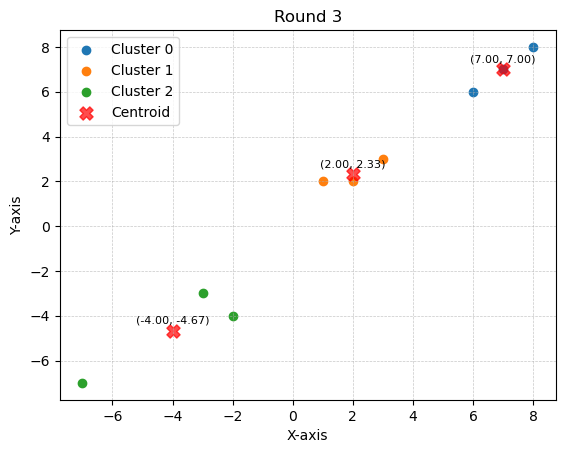

image for K = 3

## Titanic : My heart will go on

In this part of the exercise we will work on the Titanic dataset provided by Kaggle. The Titanic dataset contains information of the passengers boarding the Titanic on its final voyage. We will work on predicting whether a given passenger will survive the trip.
Let’s launch Jupyter and start coding!
We start by importing the data using Pandas

In [13]:
import pandas as pd
import numpy as np

In [14]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### T8.
What is the median age of the training set?

In [19]:
train["Age"].median()

28.0

You can easily modify the age in the dataframe by

In [20]:
train["Age"] = train["Age"].fillna(train["Age"].median())

Note that you need to modify the code above a bit to fill with mode() because mode() returns a series rather than a single value.


### T9.
Some fields like *‘Embarked’* are categorical. 
They need to be converted to numbers first. 
We will represent 
- S with 0, 
- C with 1,
- Q with 2.

What is the mode of Embarked?

In [21]:
train["Embarked"].mode().iloc[0]

'S'

 Fill the missing values with the mode. 
You can set the value of Embarked easily with the following command.

In [22]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [23]:
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

Do the same for *Sex*.

In [24]:
# Sex no NaN
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

### T10.
Write a **logistic regression** classifier using **gradient descent** as learned in class. 
Use PClass, Sex, Age, and Embarked as input features. 
You can extract the features from Pandas to Numpy by

In [25]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values)

Check the datatype of each values in data, does it make sense?\
You can force the data to be of any datatype by using the command

In [26]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
data

array([[ 3.,  0., 22.,  0.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       ...,
       [ 3.,  1., 28.,  0.],
       [ 1.,  0., 26.,  1.],
       [ 3.,  0., 32.,  2.]])

When you evaluate the trained model on the test set, you will need to make a final decision. Since logistic regression outputs a score between 0 and 1, you will need to decide whether a score of 0.3 (or any other number) means the passenger survive or not. For now, we will say if the score is greater than or equal to 0.5, the passenger survives. If the score is lower than 0.5 the passenger will be dead. This process is often called ‘Thresholding.’ We will talk more about this process later in class.

#### Logistic Regression classifier using Gradient descent

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def GradientDescent(theta, learning_rate, num_iterations, X, y):
    for i in range(num_iterations):
        y_linear = np.dot(X, theta)
        h = sigmoid(y_linear)
        gradient = np.dot((y - h), X)
        # update rule
        theta = theta + learning_rate * gradient
    return theta # best theta

def predict(X, theta):
    y_linear = np.dot(X, theta)
    h = sigmoid(y_linear)
    return np.where(h >= 0.5, 1, 0)

In [29]:
# Main function
X = data
y = np.array(train['Survived'].values)
m, n = data.shape # m = number of sample, n = number of features

# Initialize theta
theta = np.zeros(n)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Gradient Descent # to minimize Cost Function
theta = GradientDescent(theta, learning_rate, num_iterations, X, y) # best theta

/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_8064/2882555812.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [30]:
print(f'Best theta: {theta}')

Best theta: [-272.62076078  848.00861186  -20.83566712  203.50294731]


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_cfm = np.array(train['Survived'].values)
y_pred_cfm = predict(X, theta)

# Determine model accuracy and goodness of fit
accuracy_value = accuracy_score(y_test_cfm, y_pred_cfm, normalize=True)
conf_mat = confusion_matrix(y_test_cfm, y_pred_cfm)

print("The accuracy of the model is:", accuracy_value)
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is: 0.6846240179573513
Confusion Matrix:
 [[545   4]
 [277  65]]


/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_8064/2882555812.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [32]:
# test set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set
# data preparation
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

X_test = np.array(test[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
y_pred = predict(X_test, theta)

/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_8064/2882555812.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [33]:
# # save prediction to .csv
# prediction_data = pd.DataFrame({ 
#     "PassengerId": test["PassengerId"],
#     "Survived": y_pred[0]
# })
# prediction_data.to_csv("submission.csv", index=False)

### T11.
Submit a screenshot of your submission (with the scores). Upload your code to courseville.

![T11 submission score.png](<attachment:T11 submission score.png>)
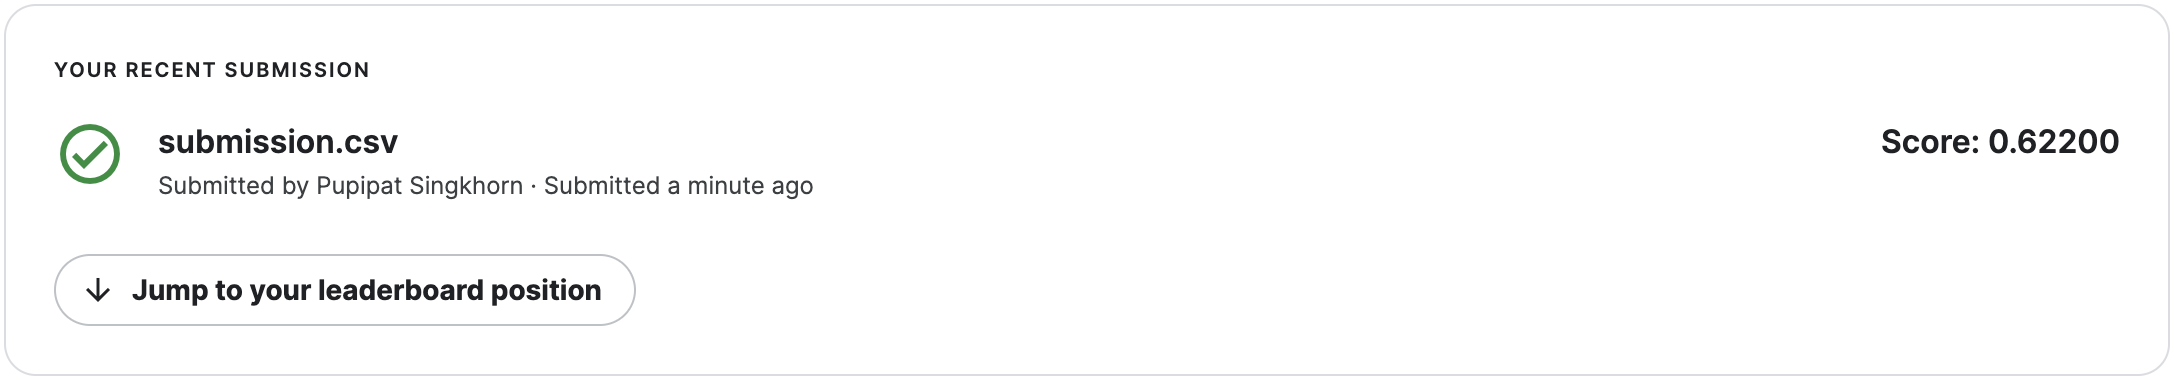

### T12.
Try adding some higher order features to your training (x1^2, x1x2,...).\
Does this model has better accuracy on the training set?\
How does it perform on the test set?

In [34]:
# Main function
X = data # "Pclass","Sex","Age","Embarked"
X[:, 1:3] **= 2 # "Pclass","Sex^2","Age^2","Embarked"
X = np.column_stack((X, X[:, 0] * X[:, 3])) # "Pclass","Sex^2","Age^2","Embarked","Pclass*Embarked"
y = np.array(train['Survived'].values)
m, n = X.shape # m = number of sample, n = number of features

# Initialize theta
theta = np.zeros(n)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Gradient Descent # to minimize Cost Function
theta = GradientDescent(theta, learning_rate, num_iterations, X, y) # best theta

/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_8064/2882555812.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [35]:
print(f'Best theta: {theta}')

Best theta: [ -859.32357328  1174.99952232 -2367.60888975   345.37516859
   426.63613184]


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_cfm = np.array(train['Survived'].values)
y_pred_cfm = predict(X, theta)

# Determine model accuracy and goodness of fit
accuracy_value = accuracy_score(y_test_cfm, y_pred_cfm, normalize=True)
conf_mat = confusion_matrix(y_test_cfm, y_pred_cfm)

print("The accuracy of the model is:", accuracy_value)
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is: 0.6161616161616161
Confusion Matrix:
 [[549   0]
 [342   0]]


/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_8064/2882555812.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [37]:
# "Pclass","Sex","Age","Embarked"
X_test
# "Pclass","Sex^2","Age^2","Embarked"
X_test[:, 1:3] **= 2 
# "Pclass","Sex^2","Age^2","Embarked","Pclass*Embarked"
X_test = np.column_stack((X_test, X_test[:, 0] * X_test[:, 3]))

y_pred = predict(X_test, theta)

/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_8064/2882555812.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Does this model has better accuracy on the training set?

**Answer**: No, from 
- T10. $Accuracy = 0.6846$
- T12. $Accuracy = 0.6162$

There is a *decrease* in accuracy on the training set.

How does it perform on the test set?

**Answer**: It could be indicative of overfitting or underfitting, as significance to accuracy lies in the balance between bias and variance. A complex model tends to increase variance but decrease bias, and vice versa

### T13.
What happens if you reduce the amount of features to just Sex and Age?

In [38]:
# Main function
X = data # "Pclass","Sex","Age","Embarked"
X = np.delete(X, [0, 3], axis=1) # "Sex", "Age"
y = np.array(train['Survived'].values)
m, n = X.shape # m = number of sample, n = number of features

# Initialize theta
theta = np.zeros(n)

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Gradient Descent # to minimize Cost Function
theta = GradientDescent(theta, learning_rate, num_iterations, X, y) # best theta

/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_8064/2882555812.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [39]:
print(f'Best theta: {theta}')

Best theta: [ 1166.1252449  -3494.47498329]


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_cfm = np.array(train['Survived'].values)
y_pred_cfm = predict(X, theta)

# Determine model accuracy and goodness of fit
accuracy_value = accuracy_score(y_test_cfm, y_pred_cfm, normalize=True)
conf_mat = confusion_matrix(y_test_cfm, y_pred_cfm)

print("The accuracy of the model is:", accuracy_value)
print("Confusion Matrix:\n", conf_mat)

The accuracy of the model is: 0.6161616161616161
Confusion Matrix:
 [[549   0]
 [342   0]]


/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_8064/2882555812.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


**Answer**: Nothing has changed; perhaps the removed features had less importance to the model.